In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from  sympy.solvers import ode
import sympy as sp
import math as m
import matplotlib.animation as anim

PUNTO 4

In [2]:
t=np.linspace(0,4.77*2360591/12,100000)
d=3.844e8
#w=2.6617e-6
G=6.67e-11
m_t=5.9736e24
r_t=6.3781e6
m_l=0.07349e24
r_l=1.7374e6

delta=G*m_t/d**3
mu=m_l/m_t
theta=np.pi/4 #ANGULO VEL INICIAL 
phi=0  #PHI INICIAL 
v=11096


In [3]:
def system(r,t,w=2.6617e-6):
    r,phi,pr,pp= r
    
    r_tilda_prima=np.sqrt(1+r**2 -2*r*np.cos(phi -w*t))
    
    r_punto=pr
    phi_punto= pp/r**2
    dpr_tilda=pp**2/r**3-(delta*(1/r**2 + mu*(r-np.cos(phi -w*t))/r_tilda_prima**3))
    dprphi_tilda=-(delta*mu*r)/(r_tilda_prima)**3 *np.sin(phi -w*t)
    return np.array([r_punto,phi_punto,dpr_tilda,dprphi_tilda])


def orden4(system,r0,t):
    h=t[1]-t[0]
    #print(h)
    R=np.zeros((len(t)))
    PHI=np.zeros_like(R)
    PR=np.zeros_like(R)
    PT=np.zeros_like(R)
    
    R[0]=r0[0]
    PHI[0]=r0[1]
    PR[0]=r0[2]
    PT[0]=r0[3]
 
    K1=np.zeros(4)
    K2=np.zeros(4)
    K3=np.zeros(4)
    K4=np.zeros(4)
    
    for i in range(1,len(t)):
        N=np.array([R[i-1],PHI[i-1],PR[i-1],PT[i-1]])
        K1=system(N,t[i-1])
        
        N=np.array([R[i-1]+0.5*h*K1[0],PHI[i-1]+0.5*h*K1[1],PR[i-1]+0.5*h*K1[2],PT[i-1]+0.5*h*K1[3]])  
        K2=system(N,t[i-1]+0.5*h)
        
        N=np.array([R[i-1]+0.5*h*K2[0],PHI[i-1]+0.5*h*K2[1],PR[i-1]+0.5*h*K2[2],PT[i-1]+0.5*h*K2[3]])
        K3=system(N,t[i-1]+0.5*h)
        
        N=np.array([R[i-1]+h*K3[0],PHI[i-1]+h*K3[1],PR[i-1]+h*K3[2],PT[i-1]+h*K3[3]])
        K4=system(N,t[i-1]+h)
        
        R[i]=  R[i-1]+ h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6
        PHI[i]=PHI[i-1]+ h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6
        PR[i]= PR[i-1]+ h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])/6
        PT[i]= PT[i-1]+ h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])/6
        
    return R,PHI,PR,PT
    

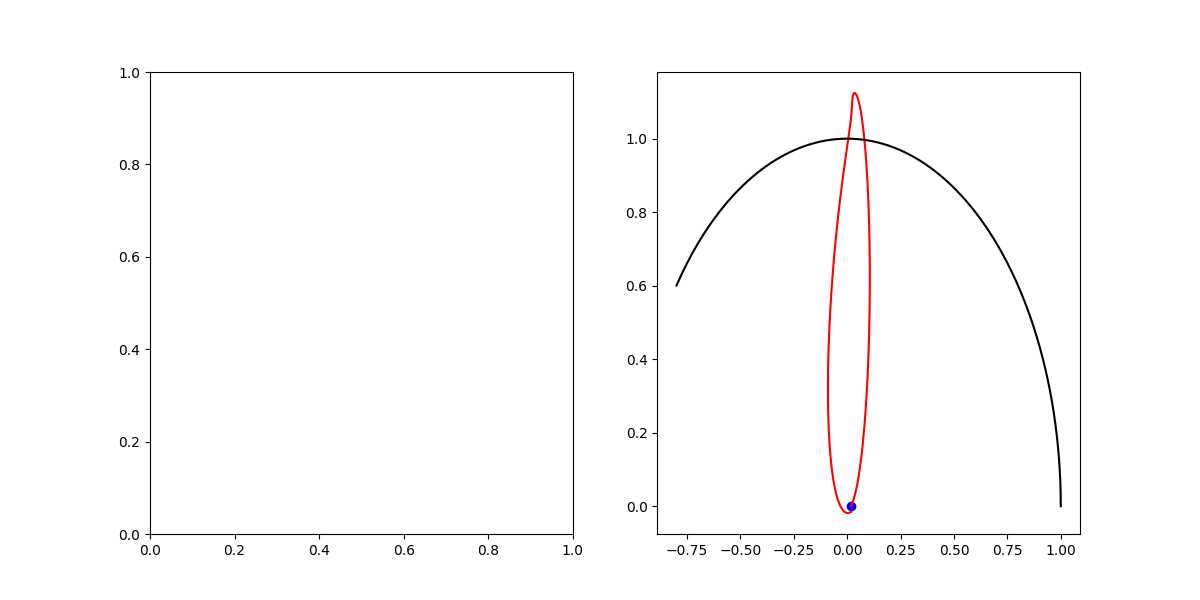

In [4]:
fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(122)
w=2.6617e-6
r0=r_t/d
phi0=phi
pr0=v*np.cos(theta-phi)/d
pp0=v*r_t*np.cos(theta-phi)/d**2
R0=np.array([r0,phi0,pr0,pp0])
R,PHI,PR,PT=orden4(system,R0,t)
XX=R*np.cos(PHI)
YY=R*np.sin(PHI)
ax1.plot(XX,YY,color="r")
ax1.scatter(R0[0]*np.cos(R0[1]),R0[0]*np.sin(R0[1]),color="b")
ax1.plot(np.cos(w*t),np.sin(w*t),color="k")


ax=fig.add_subplot(121)
scale = 800
t1 = t[::scale]
X1=XX[::scale]
Y1=YY[::scale]
def init():
    ax.clear()
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
def Update(i):
    init()
    XL=np.cos(w*t1[i])
    YL=np.sin(w*t1[i])
    nave=plt.Circle((X1[i],Y1[i]),0.006,color="r",fill=True)
    luna=plt.Circle((XL,YL),r_l/d,color="k",fill=True)
    tierra=plt.Circle((0,0),r_t/d,color="b",fill=True)
    fig.legend([nave, luna, tierra],["Nave", "Luna", "Tierra"])
    ax.add_patch(nave)
    ax.add_patch(luna)
    ax.add_patch(tierra)

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)
